<a href="https://colab.research.google.com/github/salmaNalfarsi/SQA10F6568/blob/main/FLOWER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [42]:
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'

In [43]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/rose')))
print(len(os.listdir('/content/drive/MyDrive/train/sunflower')))
print(len(os.listdir('/content/drive/MyDrive/train/tulip')))
print(len(os.listdir('/content/drive/MyDrive/train/daisy')))
print(len(os.listdir('/content/drive/MyDrive/test')))



497
495
607
173
924


In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (flowers)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1419 images belonging to 4 classes.
Found 353 images belonging to 4 classes.


In [45]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [46]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [48]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [49]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [11]:
history = resnet_model.fit(train_data, epochs=4, validation_data=validation_data)

Epoch 1/4
45/45 [==============================] - 586s 13s/step - loss: -550.4835 - accuracy: 0.2805 - val_loss: -1438.5858 - val_accuracy: 0.2805
Epoch 2/4
45/45 [==============================] - 518s 12s/step - loss: -3085.7073 - accuracy: 0.2805 - val_loss: -5245.7510 - val_accuracy: 0.2805
Epoch 3/4
45/45 [==============================] - 508s 11s/step - loss: -8278.7969 - accuracy: 0.2805 - val_loss: -11954.2197 - val_accuracy: 0.2805
Epoch 4/4
45/45 [==============================] - 452s 10s/step - loss: -16481.9824 - accuracy: 0.2805 - val_loss: -21678.0469 - val_accuracy: 0.2805


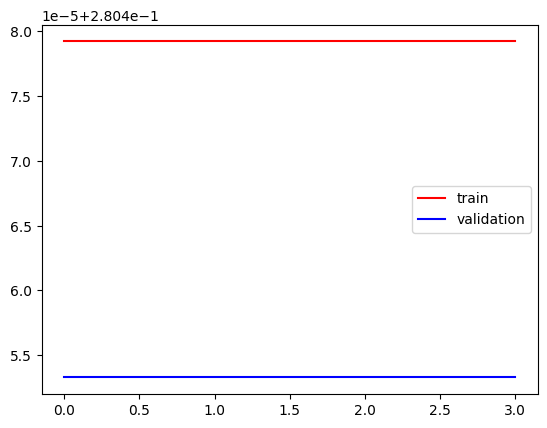

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

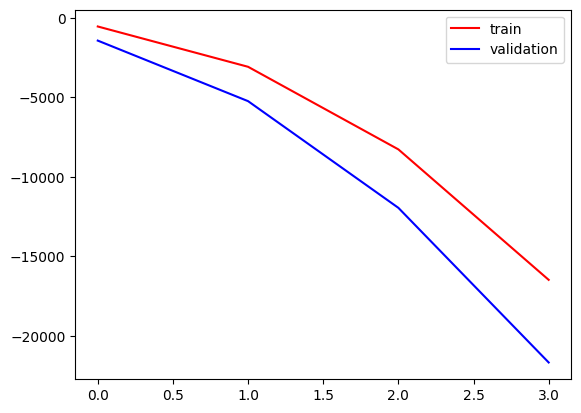

In [60]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [61]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary')

Found 0 images belonging to 0 classes.


In [62]:
#predict the train data
predictions = resnet_model.predict(train_data)
print(predictions)

45/45 [==============================] - 355s 8s/step
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [63]:
len(predictions)

1419

In [64]:

from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = train_data.classes
predicted_labels = (predictions > 0.9).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[  0 139   0   0]
 [  0 398   0   0]
 [  0 396   0   0]
 [  0 486   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.28      1.00      0.44       398
           2       0.00      0.00      0.00       396
           3       0.00      0.00      0.00       486

    accuracy                           0.28      1419
   macro avg       0.07      0.25      0.11      1419
weighted avg       0.08      0.28      0.12      1419

